Imports

In [ ]:
from traitlets.traitlets import isidentifier
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Loading dataset

In [ ]:
dataset = keras.datasets.fashion_mnist
((image_train, identifier_train),(image_test, identifier_test)) = dataset.load_data()

Showing data

Text(0.5, 1.0, '9')

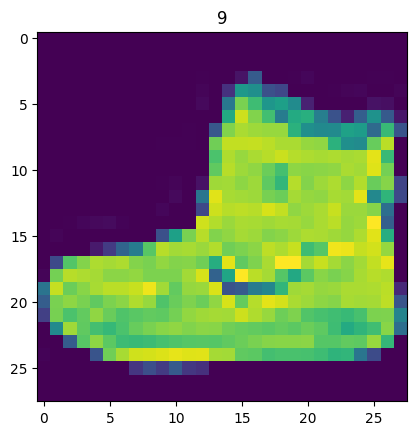

In [ ]:
plt.imshow(image_train[0])
plt.title(identifier_train[0])

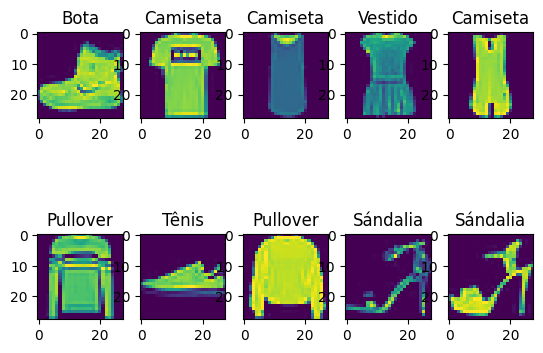

In [ ]:
classifications_names = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sándalia', 'Camisa', 'Tênis', 'Bolsa', 'Bota' ]

for image in range (10):
  plt.subplot(2,5, image + 1)
  plt.imshow(image_train[image])
  plt.title(classifications_names[identifier_train[image]])


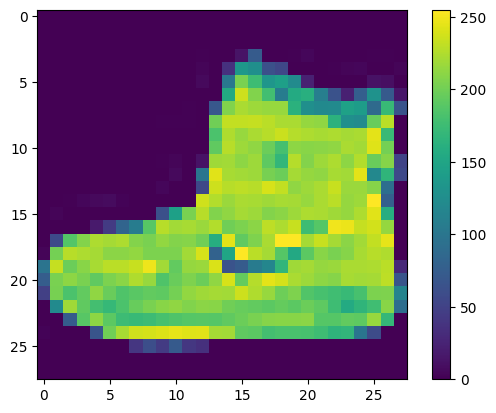

In [ ]:
plt.imshow(image_train[0])
plt.colorbar()

Normalization

In [ ]:
image_train = image_train / float(255)

Creating, compiling and training  model

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
    ])

optimizer = keras.optimizers.Adam(learning_rate=0.0001)

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'),
             keras.callbacks.ModelCheckpoint(filepath='best_model.hdf5',
                                             monitor='val_loss', save_best_only = True)]

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historico = model.fit(image_train, identifier_train, epochs=10, validation_split=0.2, batch_size=10, callbacks=callbacks)

Epoch 1/10
4800/4800 [==============================] - 52s 10ms/step - loss: 0.7136 - accuracy: 0.7587 - val_loss: 0.4539 - val_accuracy: 0.8409
Epoch 2/10
4800/4800 [==============================] - 23s 5ms/step - loss: 0.4702 - accuracy: 0.8359 - val_loss: 0.3959 - val_accuracy: 0.8600
Epoch 3/10
4800/4800 [==============================] - 28s 6ms/step - loss: 0.4155 - accuracy: 0.8538 - val_loss: 0.3837 - val_accuracy: 0.8594
Epoch 4/10
4800/4800 [==============================] - 33s 7ms/step - loss: 0.3856 - accuracy: 0.8631 - val_loss: 0.3581 - val_accuracy: 0.8727
Epoch 5/10
4800/4800 [==============================] - 35s 7ms/step - loss: 0.3624 - accuracy: 0.8690 - val_loss: 0.3471 - val_accuracy: 0.8741
Epoch 6/10
4800/4800 [==============================] - 25s 5ms/step - loss: 0.3455 - accuracy: 0.8761 - val_loss: 0.3405 - val_accuracy: 0.8761
Epoch 7/10
4800/4800 [==============================] - 23s 5ms/step - loss: 0.3300 - accuracy: 0.8819 - val_loss: 0.3279 - val_a

Model summary

In [ ]:
model_summary = model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trai

Viewing accuracy from train and validation

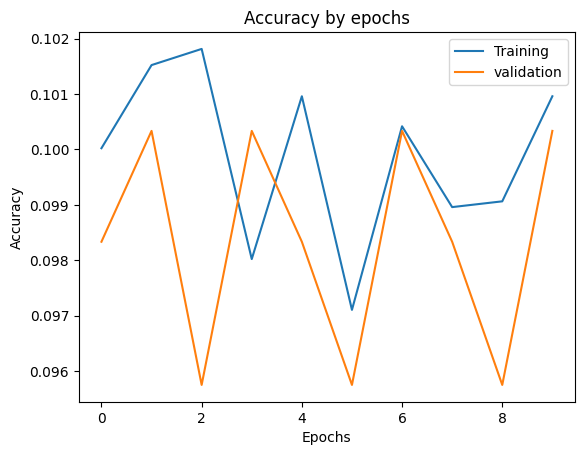

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Accuracy by epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'validation'])

Viewing loss from train and validation

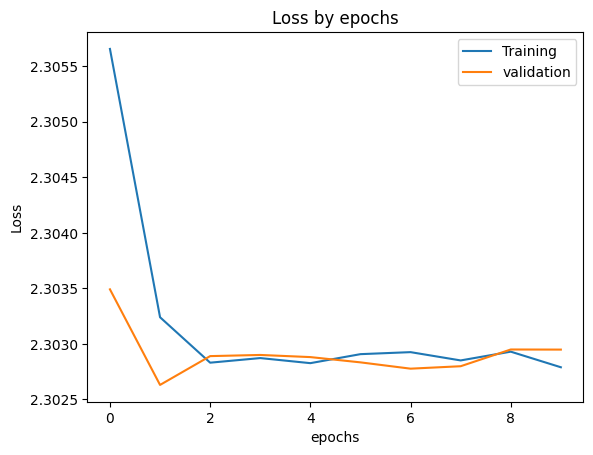

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Loss by epochs')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'validation'])

Testing the model

In [ ]:
test = model.predict(image_test)

313/313 [==============================] - 1s 3ms/step


Avaliating the model

In [ ]:
perda_teste, acuracia_teste = model.evaluate(image_test, identifier_test)

print('Loss: ', perda_teste)
print('Accuracy: ', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 2.3029 - accuracy: 0.1000
Loss:  2.302919626235962
Accuracy:  0.10000000149011612


Saving model

In [ ]:
model.save('default_model.h5')

Tranforming the weights of the first dense layer in zeros

In [ ]:
dense_layers_weights = model.layers[1].get_weights()[0]
dense_layers_weights_zeros = np.zeros(dense_layers_weights.shape)

In [ ]:
model.layers[1].set_weights([dense_layers_weights_zeros,
                             model.layers[1].get_weights()[1]])

Tranforming the weights of the first dense layer in random numbers

In [ ]:
dense_layers_weights = model.layers[1].get_weights()[0]
dense_layers_weights.shape
dense_layers_weights_random = np.random.rand(784,256)

In [ ]:
model.layers[1].set_weights([dense_layers_weights_random,
                             model.layers[1].get_weights()[1]])

Transfoming the weights and vies of the first layer in zeros

In [ ]:
dense_layers_weights = model.layers[1].get_weights()[0]
dense_layers_weights_zeros = np.zeros(dense_layers_weights.shape)

dense_layers_bias = model.layers[1].get_weights()[1]
dense_layers_bias_zeros = np.zeros(dense_layers_bias.shape)

In [ ]:
model.layers[1].set_weights([dense_layers_weights_zeros,
                             dense_layers_bias_zeros])

Compiling with new weights

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historico = model.fit(image_train, identifier_train, epochs=10, validation_split=0.2, batch_size=10)

Epoch 1/10
4800/4800 [==============================] - 23s 5ms/step - loss: 2.3057 - accuracy: 0.1000 - val_loss: 2.3035 - val_accuracy: 0.0983
Epoch 2/10
4800/4800 [==============================] - 23s 5ms/step - loss: 2.3032 - accuracy: 0.1015 - val_loss: 2.3026 - val_accuracy: 0.1003
Epoch 3/10
4800/4800 [==============================] - 23s 5ms/step - loss: 2.3028 - accuracy: 0.1018 - val_loss: 2.3029 - val_accuracy: 0.0957
Epoch 4/10
4800/4800 [==============================] - 23s 5ms/step - loss: 2.3029 - accuracy: 0.0980 - val_loss: 2.3029 - val_accuracy: 0.1003
Epoch 5/10
4800/4800 [==============================] - 23s 5ms/step - loss: 2.3028 - accuracy: 0.1010 - val_loss: 2.3029 - val_accuracy: 0.0983
Epoch 6/10
4800/4800 [==============================] - 23s 5ms/step - loss: 2.3029 - accuracy: 0.0971 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 7/10
4800/4800 [==============================] - 24s 5ms/step - loss: 2.3029 - accuracy: 0.1004 - val_loss: 2.3028 - val_ac

Saving model

In [ ]:
save_model = load_model('new_weights_model.h5')